# Explorative Data Analysis on ONEIL dataset
This notebook will analysize the ONEIL dataset by investigating
* Degree distribution of both drugs and cell lines
* Heterogeniety 
* Differences between drugs and cell lines 
* Characteristics of drug pairs 

Get drug names, do this EDA on chemicalX dataset also, investigate most common drug-pairs 

## Load data 

In [279]:
import pandas as pd
from graph_package.configs.directories import Directories
import numpy as np
import matplotlib.pyplot as plt


path = Directories.DATA_PATH / "silver" / "oneil" / "oneil.csv"
plot_path = Directories.REPO_PATH / "plots" / "oneil" 
plot_path.mkdir(parents=True, exist_ok=True)

# dtype = {"drug_1_id": int, "drug_2_id": int}
df = pd.read_csv(path)  # ,dtype=dtype)
df.head(-10)

,block_id,drug_row,drug_col,cell_line_name,study_name,tissue_name,conc_row_unit,conc_col_unit,ic50_row,ic50_col,...,S_mean,S_max,synergy_zip,synergy_loewe,synergy_hsa,synergy_bliss,drug_row_clinical_phase,drug_col_clinical_phase,drug_row_target_name,drug_col_target_name
0,16145,5-Fluorouracil,Veliparib,EFM192B,ONEIL,breast,uM,uM,10.00000,10.000000,...,20.4610,10.0815,-3.608485,-10.705039,-2.050132,-0.719085,4,3,Prelamin-A/C; Survival motor neuron protein; T...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...
1,16146,5-Fluorouracil,Veliparib,EFM192B,ONEIL,breast,uM,uM,10.00000,10.000000,...,14.8460,4.4665,-9.420828,-12.552164,-3.897257,-2.566210,4,3,Prelamin-A/C; Survival motor neuron protein; T...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...
2,16147,5-Fluorouracil,Veliparib,EFM192B,ONEIL,breast,uM,uM,10.00000,10.000000,...,23.3770,12.9975,3.657530,-4.027289,4.627618,5.958665,4,3,Prelamin-A/C; Survival motor neuron protein; T...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...
3,16148,5-Fluorouracil,Veliparib,EFM192B,ONEIL,breast,uM,uM,10.00000,10.000000,...,17.9165,7.5370,0.521115,-9.395789,-0.740882,0.590165,4,3,Prelamin-A/C; Survival motor neuron protein; T...,Poly [ADP-ribose] polymerase-1; Poly [ADP-ribo...
4,16149,5-Fluorouracil,MK-1775,EFM192B,ONEIL,breast,uM,uM,10.00000,0.500000,...,26.5910,26.3835,-8.567179,-1.107976,2.664619,-5.781006,4,2,Prelamin-A/C; Survival motor neuron protein; T...,Serine/threonine-protein kinase TBK1; Protein ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92193,80298,Vorinostat,Sorafenib,UACC62,ONEIL,skin,uM,uM,1.37839,8.441226,...,34.5985,27.1555,1.621799,-5.445305,3.567297,1.676725,4,4,Histone deacetylase; Histone deacetylase 1; Hi...,Serine/threonine-protein kinase RAF; MAP kinas...
92194,80299,Vorinostat,Sorafenib,UACC62,ONEIL,skin,uM,uM,1.37839,8.441226,...,33.6475,26.2045,1.736226,-3.837180,5.175422,3.284850,4,4,Histone deacetylase; Histone deacetylase 1; Hi...,Serine/threonine-protein kinase RAF; MAP kinas...
92195,80300,Vorinostat,Sorafenib,UACC62,ONEIL,skin,uM,uM,1.37839,8.441226,...,34.1620,26.7190,3.618235,-1.425555,7.587047,5.696475,4,4,Histone deacetylase; Histone deacetylase 1; Hi...,Serine/threonine-protein kinase RAF; MAP kinas...
92196,80301,Vorinostat,Sunitinib,UACC62,ONEIL,skin,uM,uM,1.37839,5.000000,...,39.0680,33.2920,-0.061897,-2.344817,6.175948,3.758361,4,4,Histone deacetylase; Histone deacetylase 1; Hi...,Vascular endothelial growth factor receptor 2;...


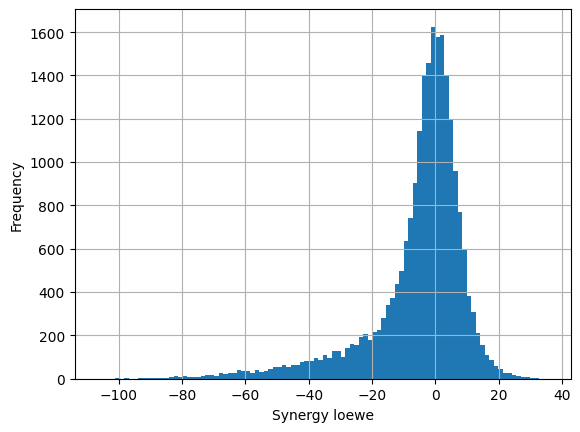

In [312]:
def add_loewe_classification(df: pd.DataFrame):
    df = df.groupby(["drug_row", "drug_col", "cell_line_name"]).mean().reset_index()
    df["synergy_loewe_classification"] = df["synergy_loewe"].apply(
        lambda x: 0 if x < 0 else (1 if x > 10 else pd.NA)
    )
    return df

df_agg_mean = add_loewe_classification(df)

sub_df = df_agg_mean['synergy_loewe'].hist(bins=100)
plt.xlabel("Synergy loewe")
plt.ylabel("Frequency")
plt.savefig(plot_path  / "synergy_loewe_mean.png")
plt.show()

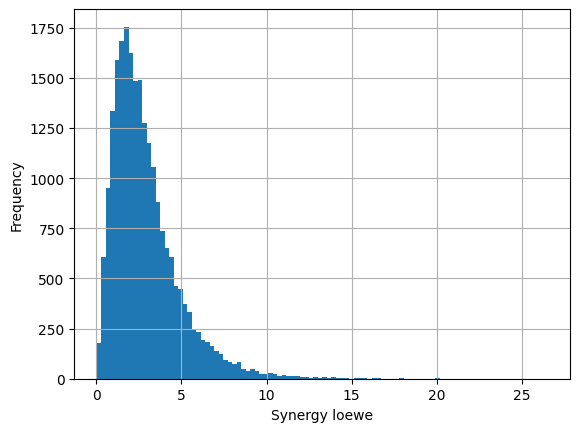

In [281]:
sub_df = df.groupby(["drug_row", "drug_col", "cell_line_name"]).std()['synergy_loewe'].hist(bins=100)
plt.xlabel("Synergy loewe")
plt.ylabel("Frequency")
plt.savefig(plot_path  / "synergy_loewe_std.png")
plt.show()

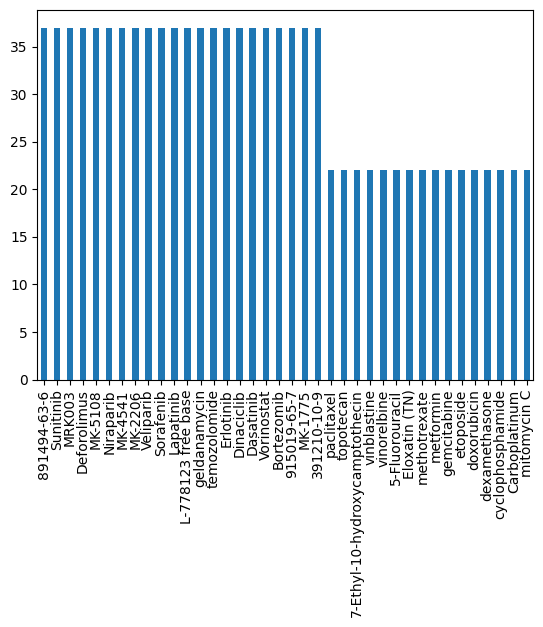

In [282]:
df_pairs = pd.concat((df, df.rename(columns={'drug_col': 'drug_row', 'drug_row': 'drug_col'})))

df_pairs_new = df_pairs[["drug_row","drug_col"]].drop_duplicates()
df_pairs_new = df_pairs_new.drug_row.value_counts()
# df_pairs_agg_agg.plot(kind='bar')
df_pairs_new.plot(kind="bar")
df_tested_on_all = df_pairs_new[df_pairs_new==37].index
plt.show()

## Degree distribution

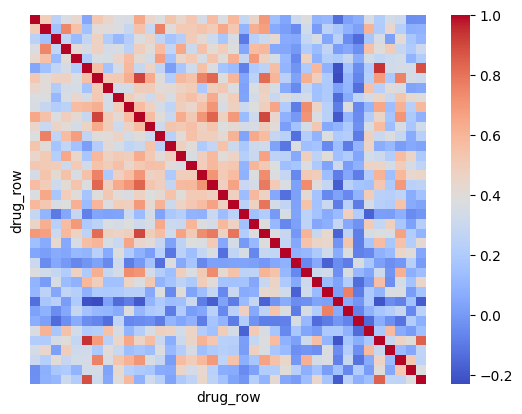

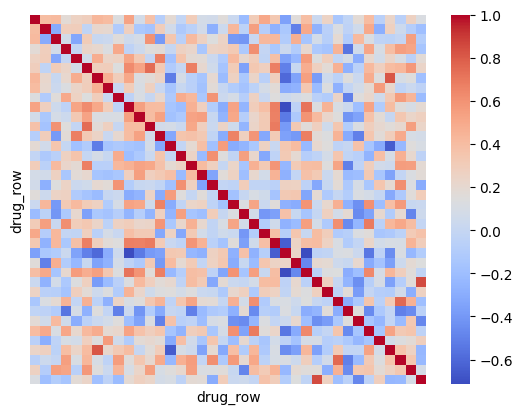

In [315]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the DataFrame
df_classification = df_agg_mean.dropna()
df_pairs_classification = pd.concat((df_classification, df_classification.rename(columns={'drug_col': 'drug_row', 'drug_row': 'drug_col'})))


df_drug = df_pairs.groupby(["drug_row","cell_line_name"]).agg({"synergy_loewe": "mean"}).reset_index()
df_drug_classification = df_pairs_classification.groupby(["drug_row","cell_line_name"]).agg({"synergy_loewe_classification":"mean"}).reset_index()

# Pivot the DataFrame to create a square DataFrame with all drug pairs
loewe_classification = df_drug_classification.pivot(
    index="cell_line_name", columns="drug_row", values="synergy_loewe_classification")

loewe = df_drug.pivot(
    index="cell_line_name", columns="drug_row", values="synergy_loewe").corr()

loewe_classification_corr = loewe_classification.corr()
loewe_corr = loewe.corr()


# Fill in the missing values for inverse pairs

#loewe_classification_corr = loewe_classification_corr.fillna(loewe_classification_corr.T)




# Create the heatmap using seaborn
sns.heatmap(loewe_classification_corr, cmap='coolwarm', annot=False, xticklabels=False, yticklabels=False)
plt.savefig(plot_path  / "drug_drug_classification_corr.png")
plt.show()
sns.heatmap(loewe_corr, cmap='coolwarm', annot=False, xticklabels=False, yticklabels=False)
plt.savefig(plot_path  / "drug_drug_corr.png")
plt.show()

We see that fx drug 7 has high correlation for a large variety of drugs,

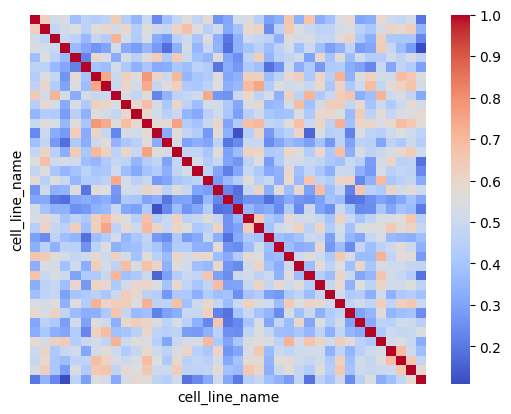

Number of values with correlation greater than 0.8, out of 1482 comparisons: 12.0
Number of values with correlation lower than -0.8, out of 1482 comparisons: -19.5


In [317]:


df_pairs_agg = df_pairs.groupby(["drug_row","drug_col","cell_line_name"]).agg({"synergy_loewe": "mean"}).reset_index()


corr = df_agg_mean.pivot(
    index=["drug_row", "drug_col"], columns="cell_line_name", values="synergy_loewe"
).corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, xticklabels=False, yticklabels=False)
plt.savefig(plot_path  / "cell_line_corr.png")
plt.show()

num_high_corr_values = (np.sum(np.abs(corr) > 0.7).sum()-39)/2
# Print the result
print(
    f"Number of values with correlation greater than 0.8, out of {39*38} comparisons: {num_high_corr_values}"
)

num_high_corr_values = (np.sum(np.abs(corr) < -0.7).sum()-39)/2
# Print the result
print(
    f"Number of values with correlation lower than -0.8, out of {39*38} comparisons: {num_high_corr_values}"
)

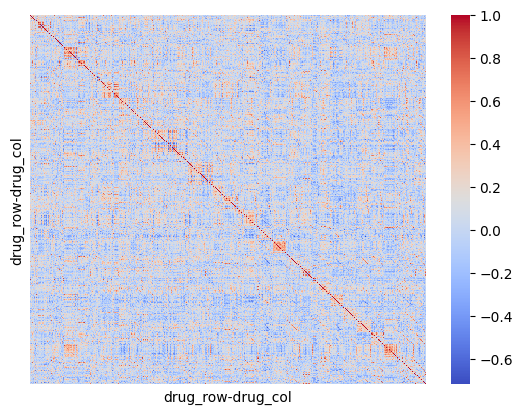

Number of values with correlation greater than 0.8, out of 169653.0 comparisons: 191.0
Number of values with correlation lower than -0.8, out of 169653.0 comparisons: -291.5


In [318]:
import numpy as np

corr = df_agg_mean.pivot(
    index=["cell_line_name"], columns=["drug_row", "drug_col"], values="synergy_loewe"
).corr()
sns.heatmap(corr, cmap="coolwarm", annot=False, xticklabels=False, yticklabels=False)
plt.savefig(plot_path  / "drug_pair_drug_pair_corr.png")
plt.show()

num_high_corr_values = (np.sum(np.abs(corr) > 0.8).sum()-583)/2
# Print the result
print(
    f"Number of values with correlation greater than 0.8, out of {(583**2-583)/2} comparisons: {num_high_corr_values}"
)

num_high_corr_values = (np.sum(np.abs(corr) < -0.8).sum()-583)/2
# Print the result
print(
    f"Number of values with correlation lower than -0.8, out of {(583**2-583)/2} comparisons: {num_high_corr_values}"
)

/var/folders/9k/yv9l3z555rqbpfjjrbqkks4r0000gn/T/ipykernel_82234/3426161009.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  violin_plot.set_xticklabels(violin_plot.get_xticklabels(), rotation=90)


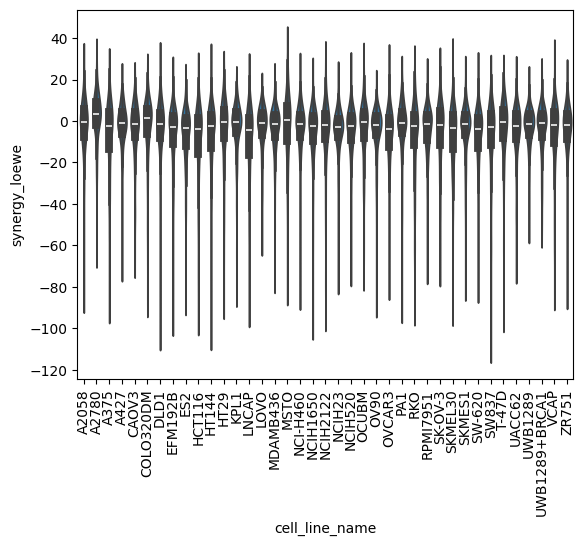

In [320]:

violin_plot = sns.violinplot(x='cell_line_name', y='synergy_loewe', data=df_agg_mean)
# Rotate the x-axis labels for better readability
violin_plot.set_xticklabels(violin_plot.get_xticklabels(), rotation=90)
plt.savefig(plot_path  / "cell_line_violin.png")
plt.show()

/var/folders/9k/yv9l3z555rqbpfjjrbqkks4r0000gn/T/ipykernel_82234/1539878911.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  violin_plot.set_xticklabels(violin_plot.get_xticklabels(), rotation=90)


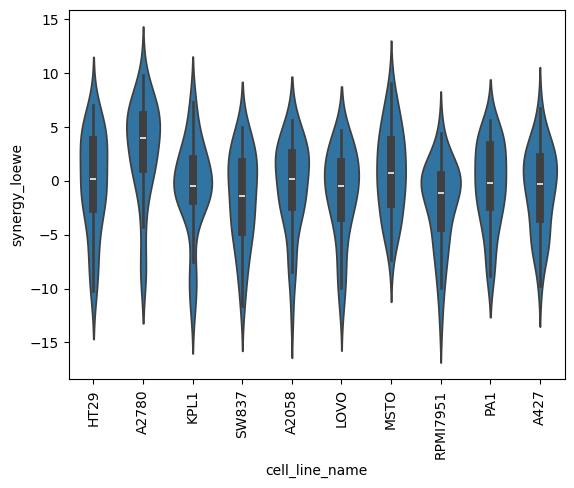

In [322]:
df_pairs_agg_variation = df_pairs_agg[(df_pairs_agg["synergy_loewe"] > -20) & (df_pairs_agg["synergy_loewe"] < 20)]
df_pairs_variation = df_pairs_agg_variation.groupby(['cell_line_name','drug_row']).agg({'synergy_loewe':'mean'})
df_pairs_order = df_pairs_variation.groupby(['cell_line_name']).agg({'synergy_loewe':'std'}).sort_values(by='synergy_loewe', ascending=False)
cell_line_order = df_pairs_order.index
cell_lines_to_include = cell_line_order[:10]
violin_plot = sns.violinplot(x='cell_line_name', y='synergy_loewe', data=df_pairs_variation.loc[cell_lines_to_include])
# Rotate the x-axis labels for better readability
violin_plot.set_xticklabels(violin_plot.get_xticklabels(), rotation=90)
plt.savefig(plot_path  / "cell_line_drug_violin.png")
plt.show()

/var/folders/9k/yv9l3z555rqbpfjjrbqkks4r0000gn/T/ipykernel_82234/1828541916.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  violin_plot.set_xticklabels(violin_plot.get_xticklabels(), rotation=90)


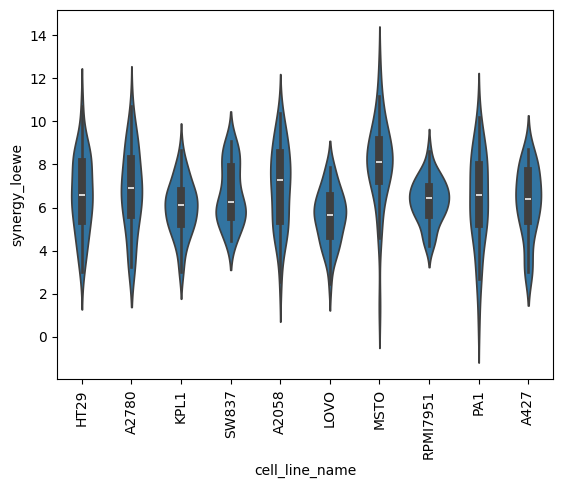

In [321]:
df_pairs_variation = df_pairs_agg_variation.groupby(['cell_line_name','drug_row']).agg({'synergy_loewe':'std'})
violin_plot = sns.violinplot(x='cell_line_name', y='synergy_loewe', data=df_pairs_variation.loc[cell_lines_to_include])
# Rotate the x-axis labels for better readability
violin_plot.set_xticklabels(violin_plot.get_xticklabels(), rotation=90)
plt.savefig(plot_path  / "cell_line_drug_std_violin.png")
plt.show()